In [1]:
# LR vs SR analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set(style="whitegrid")

In [ ]:
assembly=pd.read_csv('../Table_S11_assembly_stats.csv')

In [3]:
assembly.head()

,study,sample,wellID,Subject_ID,subsample,data_Gb,data,data2,assembler,seq_assembler,total_sequence_data,total_assembly_size_bp,total_contigs,mean_contig_bp,max_contig_bp,N50_bp,N50_contigs,Hsap,subsample.1,sub_amount
0,2024 Minich,C537.fasta,a1,526,0,NaN,Illumina,short read,cloudspades,Illumina cloudspades,NaN,130466008.0,193539.0,674.11,526788,1326,10854.0,yes Hsap,0,NaN
1,2024 Minich,C538.fasta,b1,549,0,NaN,Illumina,short read,cloudspades,Illumina cloudspades,NaN,197881884.0,318348.0,621.59,440073,1051,22892.0,yes Hsap,0,NaN
2,2024 Minich,C539.fasta,c1,553,0,NaN,Illumina,short read,cloudspades,Illumina cloudspades,NaN,98740452.0,109396.0,902.60,617881,3856,2651.0,yes Hsap,0,NaN
3,2024 Minich,C540.fasta,d1,603,0,NaN,Illumina,short read,cloudspades,Illumina cloudspades,NaN,141594076.0,228341.0,620.10,848242,2596,2790.0,yes Hsap,0,NaN
4,2024 Minich,C541.fasta,e1,699,0,NaN,Illumina,short read,cloudspades,Illumina cloudspades,NaN,234026922.0,355038.0,659.16,499812,1300,19199.0,yes Hsap,0,NaN


In [4]:
subonly=assembly.loc[(assembly['subsample']==1)]

In [5]:
subonly.shape

(23, 20)

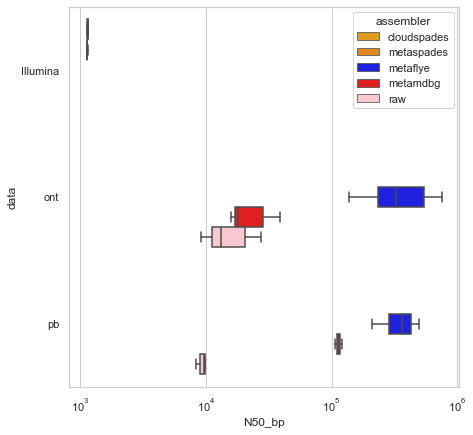

In [6]:
#N50 of A6, D5, and H6 only PB and ONT are subsampled to 10 Gb to be comparable to the Illumina which was ~10 Gb
plt.subplots(figsize=(7,7))
n50a=sns.boxplot(data=subonly, x="N50_bp", y="data", hue="assembler", palette=['orange', 'darkorange', 'blue', 'red', 'pink'])
#n50=sns.swarmplot(data=short, x="N50_bp_log", y="data", hue="assembler", color='black', size=3)
n50a.set(xscale="log") 
plt.savefig('supp_fig4A_N50_bp_log_sub.png', dpi=600)

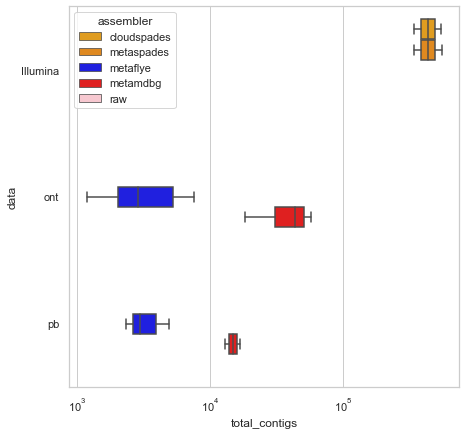

In [7]:
#total contigs of A6, D5, and H6 only PB and ONT are subsampled to 10 Gb to be comparable to the Illumina which was ~10 Gb

plt.subplots(figsize=(7,7))
contig=sns.boxplot(data=subonly, x="total_contigs", y="data", hue="assembler", palette=['orange', 'darkorange', 'blue', 'red', 'pink'])
contig.set(xscale="log")
plt.savefig('supp_fig4C_total_contigs_sub.png', dpi=600)

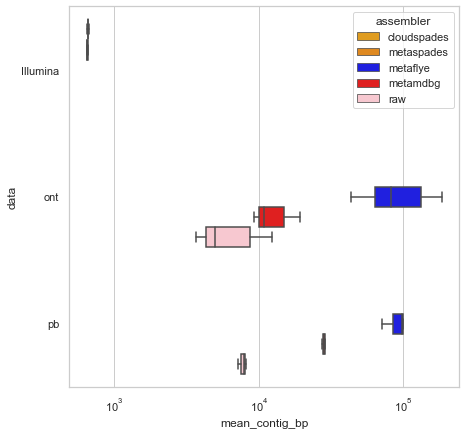

In [8]:
#mean contig length bp of A6, D5, and H6 only PB and ONT are subsampled to 10 Gb to be comparable to the Illumina which was ~10 Gb

plt.subplots(figsize=(7,7))
meancontig=sns.boxplot(data=subonly, x="mean_contig_bp", y="data", hue="assembler", palette=['orange', 'darkorange', 'blue', 'red', 'pink'])
meancontig.set(xscale="log")
plt.savefig('supp_fig4B_assembly_mean_contig_bp_sub.png', dpi=600)

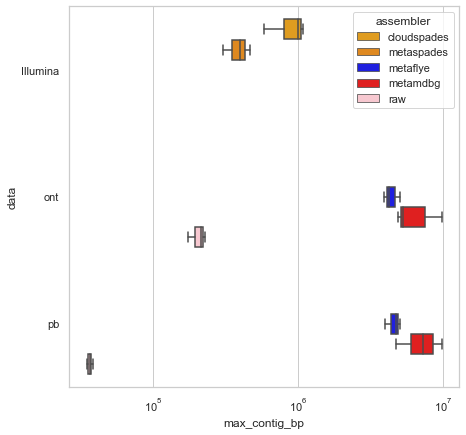

In [9]:
#max contig length bp of A6, D5, and H6 only PB and ONT are subsampled to 10 Gb to be comparable to the Illumina which was ~10 Gb
plt.subplots(figsize=(7,7))
maxcontig=sns.boxplot(data=subonly, x="max_contig_bp", y="data", hue="assembler", palette=['orange', 'darkorange', 'blue', 'red', 'pink'])
maxcontig.set(xscale="log")
plt.savefig('supp_fig4D_assembly_max.png', dpi=600)

In [10]:
#######################################
# This analysis is not part of the manuscript but includes all of the data including a subset of the samples from the 2023 Carter/Olm paper.

In [11]:
#Create df which removes the ONT-metamdbg and PB-metaflye
short=assembly.loc[(assembly['seq_assembler']!='ont metamdbg') & (assembly['seq_assembler']!='pb metaflye')]
short

,study,sample,wellID,Subject_ID,subsample,data_Gb,data,data2,assembler,seq_assembler,total_sequence_data,total_assembly_size_bp,total_contigs,mean_contig_bp,max_contig_bp,N50_bp,N50_contigs,Hsap,subsample.1,sub_amount
0,2024 Minich,C537.fasta,a1,526,0,NaN,Illumina,short read,cloudspades,Illumina cloudspades,NaN,130466008.0,193539.0,674.11,526788,1326,10854.0,yes Hsap,0,NaN
1,2024 Minich,C538.fasta,b1,549,0,NaN,Illumina,short read,cloudspades,Illumina cloudspades,NaN,197881884.0,318348.0,621.59,440073,1051,22892.0,yes Hsap,0,NaN
2,2024 Minich,C539.fasta,c1,553,0,NaN,Illumina,short read,cloudspades,Illumina cloudspades,NaN,98740452.0,109396.0,902.60,617881,3856,2651.0,yes Hsap,0,NaN
3,2024 Minich,C540.fasta,d1,603,0,NaN,Illumina,short read,cloudspades,Illumina cloudspades,NaN,141594076.0,228341.0,620.10,848242,2596,2790.0,yes Hsap,0,NaN
4,2024 Minich,C541.fasta,e1,699,0,NaN,Illumina,short read,cloudspades,Illumina cloudspades,NaN,234026922.0,355038.0,659.16,499812,1300,19199.0,yes Hsap,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,2024 Minich,Hsap_meta_h2.v1.pb.concat.no_hsap_nanoplot.html,h2,798,0,3.355,pb,long read,raw,raw PB,3.354922e+09,NaN,NaN,8773.00,33230,11990,NaN,no Hsap,0,NaN
437,2024 Minich,Hsap_meta_h3.v1.pb.concat.no_hsap_nanoplot.html,h3,798,0,0.787,pb,long read,raw,raw PB,7.869319e+08,NaN,NaN,12310.00,28832,12987,NaN,no Hsap,0,NaN
438,2024 Minich,Hsap_meta_h4.v1.pb.concat.no_hsap_nanoplot.html,h4,798,0,5.671,pb,long read,raw,raw PB,5.671288e+09,NaN,NaN,9219.00,53166,11070,NaN,no Hsap,0,NaN
439,2024 Minich,Hsap_meta_h5.v1.pb.concat.no_hsap_nanoplot.html,h5,798,0,1.008,pb,long read,raw,raw PB,1.007575e+09,NaN,NaN,7734.00,33073,8501,NaN,no Hsap,0,NaN


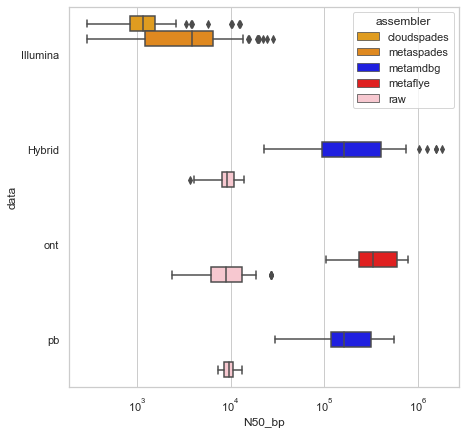

In [12]:
#includes data just from best LR
plt.subplots(figsize=(7,7))
n50=sns.boxplot(data=short, x="N50_bp", y="data", hue="assembler", palette=['orange', 'darkorange', 'blue', 'red', 'pink'])
#n50=sns.swarmplot(data=short, x="N50_bp_log", y="data", hue="assembler", color='black', size=3)
n50.set(xscale="log") 
plt.savefig('N50_bp_log.png', dpi=600)

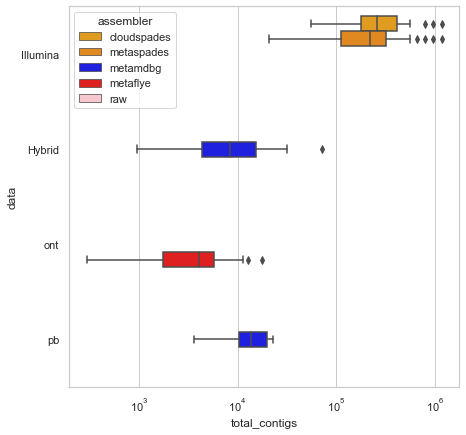

In [13]:
#includes data just from best LR
plt.subplots(figsize=(7,7))
n50=sns.boxplot(data=short, x="total_contigs", y="data", hue="assembler", palette=['orange', 'darkorange', 'blue', 'red', 'pink'])
n50.set(xscale="log")
plt.savefig('total_contigs.png', dpi=600)

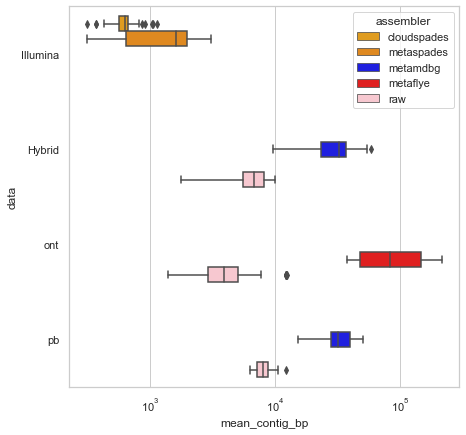

In [14]:
#includes data just from best LR
plt.subplots(figsize=(7,7))
n50=sns.boxplot(data=short, x="mean_contig_bp", y="data", hue="assembler", palette=['orange', 'darkorange', 'blue', 'red', 'pink'])
n50.set(xscale="log")
plt.savefig('assembly_mean_contig_bp.png', dpi=600)

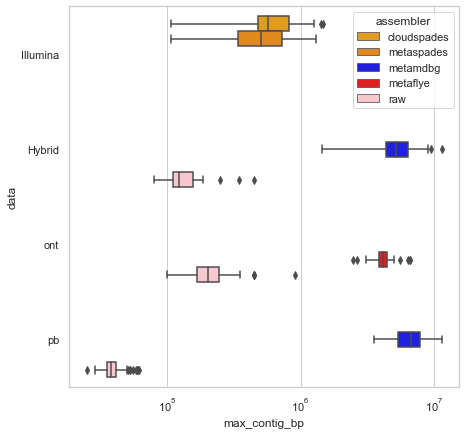

In [15]:
#includes data just from best LR
plt.subplots(figsize=(7,7))
n50=sns.boxplot(data=short, x="max_contig_bp", y="data", hue="assembler", palette=['orange', 'darkorange', 'blue', 'red', 'pink'])
n50.set(xscale="log")
plt.savefig('assembly_max.png', dpi=600)